 Written by Federica B. Bianco @fedhere
 NYU CUSP PUI

 Assignment 1 Homework 4

 This is a skeleton & instruction notebook

-  GENERATE  100 samples of different sizes N (N>10 & N<2000) from each of 5 different distributions (500 samples in total), 
 _all with the same population mean_. Include a _Normal_, a _Poisson_, a _Binomial_, a _Chi-Squared_ distribution, and 1 more of your choice.                                       
-  For each sample plot the sample mean (dependent var.) against the sample size N (independent var.) (if you want you can do it with the sample standard deviation as well). 
-  Describe the behavior you see in the plots in terms of the law of large numbers.
-  PLOT the distributions of all sample means (together for all distributions). _Mandatory_: as a histogram. _Optional_: in any other way you think is convincing
 Extra Credit: FIT a gaussian to the distribution of means            

In [1]:
from __future__ import print_function
__author__= 'uak211'
from scipy.optimize import curve_fit, minimize
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

%matplotlib inline
plt.rcParams.update({'font.size': 14})

#### define plotting functions

In [2]:
def plot_hist(distribution_key, bins):
    plt.style.use('seaborn-ticks')
    fig, ax = plt.subplots(figsize = (15, 5))
    ax.set(xlabel = r'$\bar{X}$', ylabel = 'n',
           title = 'distribution sample size plotted against sample means')
    ax.hist(distributions[distribution_key], bins = bins)
    
def plot_scatter(distribution_key):
    plt.style.use('seaborn-ticks')
    ax = plt.figure(figsize = (15, 5)).add_subplot(111) 
    ax.set(xlabel = 'sample size', ylabel = r'$\bar{x}$', 
           title = 'distribution sample means plotted against sample size')
    ax.plot(sample_sizes, distributions[distribution_key],  'o')
    ax.plot([min(sample_sizes), max(sample_sizes)], [mu, mu])

#### setting sample sizes

In [3]:
np.random.seed(123)
sample_sizes = np.random.uniform(low = 11, high = 1999, size = 100).astype(int)
print (sample_sizes, sample_sizes.shape)

[1395  579  461 1107 1441  852 1960 1372  967  790  693 1460  882  129  802
 1478  373  359 1067 1068 1272 1699 1451 1225 1447  653  730  464  594 1265
  194  873  867  992  857  631  858 1787 1887 1008 1251  240  641  835 1733
  508  971 1970 1043 1229  250 1653 1209 1094  692  615  840 1365 1751 1025
 1341 1175 1253 1352 1685  176 1529  495  397 1149  201 1771 1257 1449   43
 1192 1117  327  315 1393  644 1386 1113  784 1850 1684  721   97  616  802
 1412 1989  718 1526 1190 1386  311  803  489  693] (100,)


#### setting population mean,  distributions,  and sample means

In [4]:
mu = 100
sigma = 10
distribution = ['chisq', 'gaussian', 'pois', 'binomial', 'wald', 'all']
distributions = {}
distributions[distribution[0]] = [np.random.chisquare(df = mu, size = size).mean() for size in sample_sizes]
distributions[distribution[1]] = [np.random.normal(loc = mu, scale = sigma, size = size).mean() for size in sample_sizes]
distributions[distribution[2]] = [np.random.poisson(lam = mu, size = size).mean() for size in sample_sizes]
distributions[distribution[3]] = [np.random.binomial(n = 2 * mu, p = 0.5, size = size).mean() for size in sample_sizes]
distributions[distribution[4]] = [np.random.wald(mean = mu, scale = 1, size = size).mean() for size in sample_sizes]
distributions[distribution[5]] = [xbar for distribution in distributions.values() for xbar in distribution]

## first distribution: chi squared

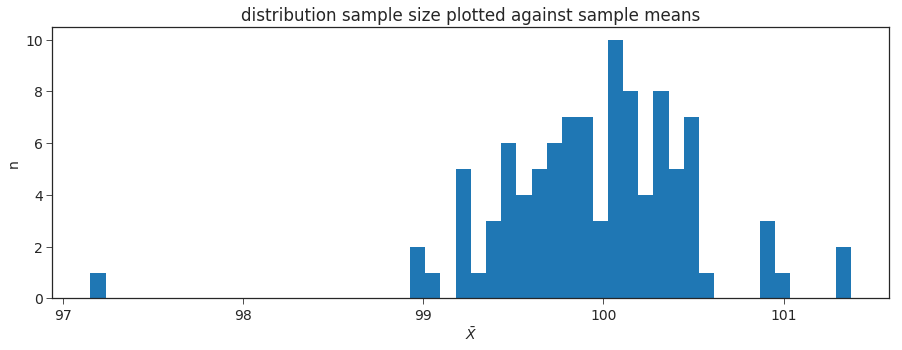

In [5]:
plot_hist('chisq', bins = 50)

Fig. 1: histogram of the chi squared distribution with df = 100, N = 200. As degrees of freedom increase, the chi squared distribution becomes the standard normal. 

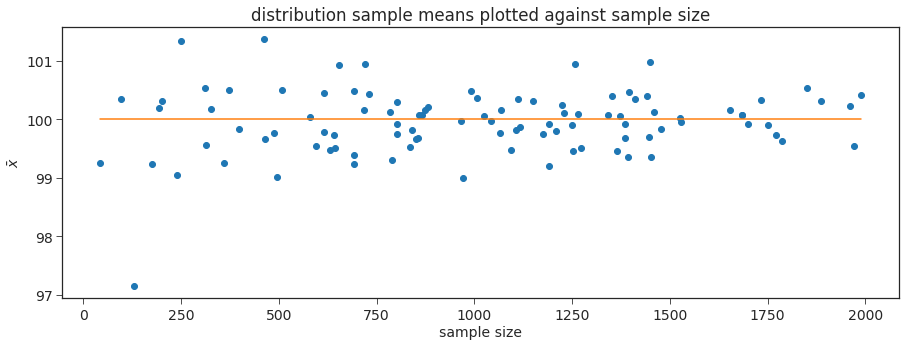

In [6]:
plot_scatter('chisq')

Fig. 2: scatterplot of samples drawn from chi square distribution ($\mu$ = 100). According to the law of large numbers, the sample means converge to the population mean as the sample size approaches infinity. In this figure, we see the sample means of the larger-sized samples plotted closer to the population mean asymptote.

## second distribution: gaussian normal

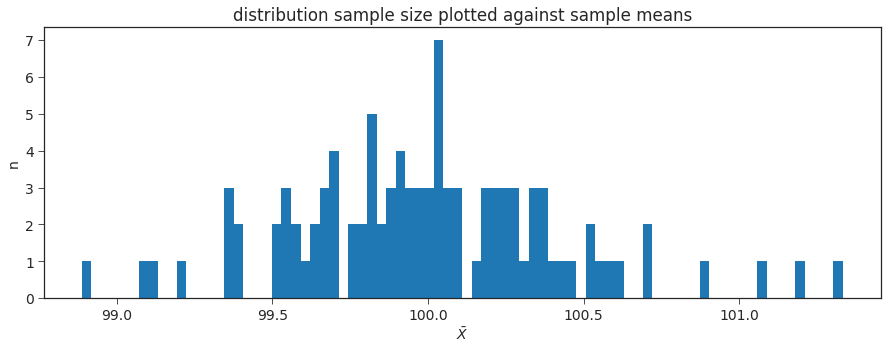

In [7]:
plot_hist('gaussian', bins = 80)

Fig. 3: histogram of sample means drawn from gaussian normal distributon ($\mu$ = 100). According to the law of large numbers, the sample means converge to the population mean as the sample size approaches infinity. In this figure, we see samples with larger sizes plotted closer to the the population mean.

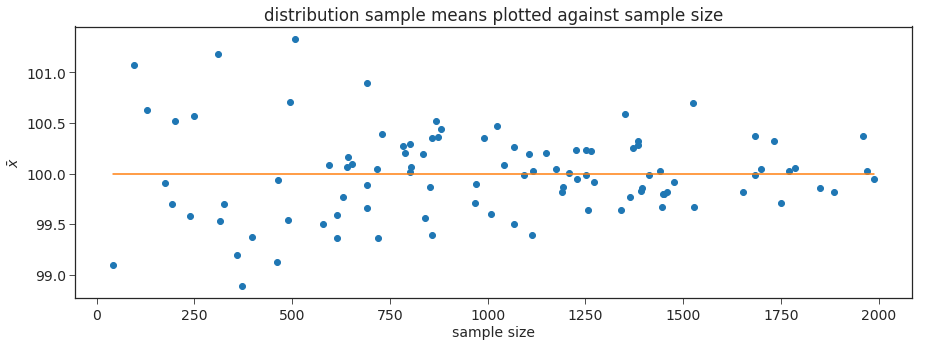

In [8]:
plot_scatter('gaussian')

Fig. 4: scatterplot of sample means drawn from gaussian normal distributon ($\mu$ = 100). According to the law of large numbers, the sample means converge to the population mean as the sample size approaches infinity. In this figure, we see the sample means of the larger-sized samples plotted closer to the population mean asymptote. 

## third distribution: poisson

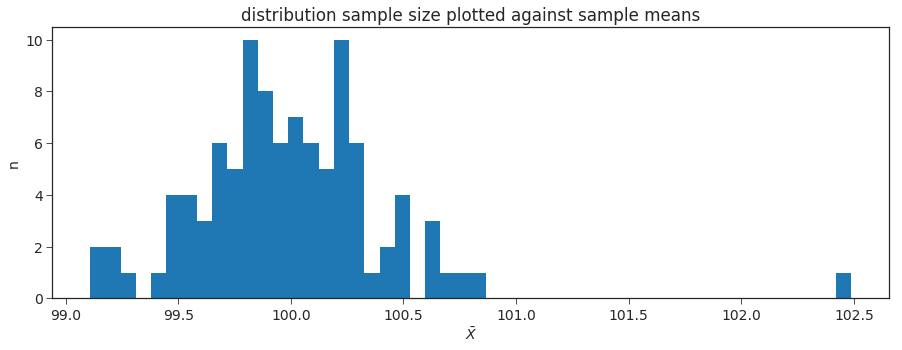

In [9]:
plot_hist('pois', bins = 50)

Fig. 5: histogram of sample means drawn from poisson distributon ($\lambda$ = 100). According to the law of large numbers, the sample means converge to the population mean as the sample size approaches infinity. In this figure, we see samples with larger sizes plotted closer to the the population mean.

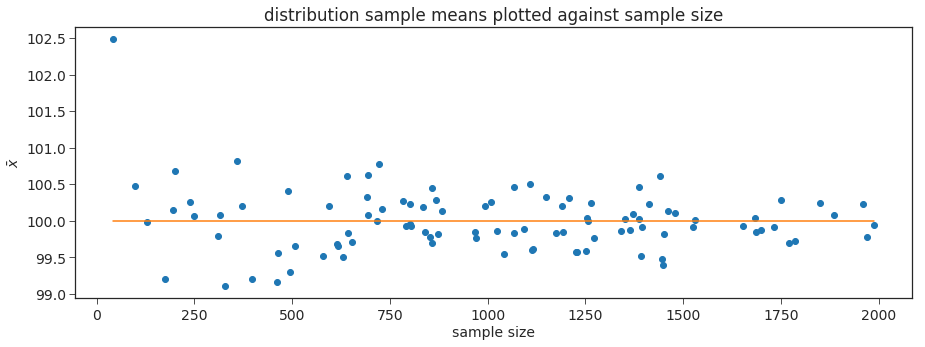

In [10]:
plot_scatter('pois')

Fig. 6: scatterplot of sample means drawn from poisson distributon ($\lambda$ = 100). According to the law of large numbers, the sample means converge to the population mean as the sample sizes approach infinity. In this figure, we see the sample means of the larger-sized samples plotted closer to the population mean asymptote. 

## fourth distribution: binomial

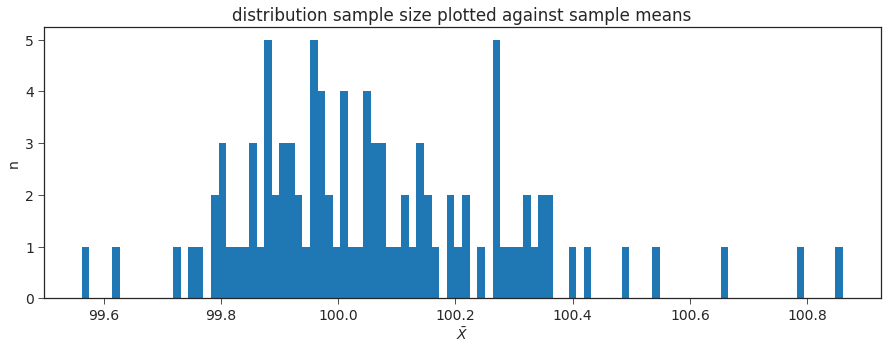

In [11]:
plot_hist('binomial', bins = 100)

Fig. 7: histogram of sample means drawn from the binomial distributon. According to the law of large numbers, the sample means converge to the population mean as the sample size approaches infinity. In this figure, we see samples with a larger number of trials plotted closer to the the population mean.

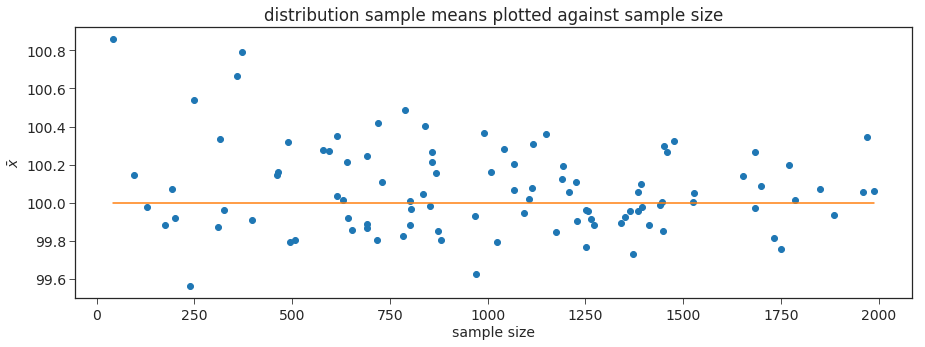

In [12]:
plot_scatter('binomial')

Fig. 8: scatterplot of sample means drawn from the binomial distributon (p = 0.5). According to the law of large numbers, the sample means converge to the population mean as the sample size approaches infinity. In this figure, we see the sample means of the larger-sized samples plotted closer to the population mean asymptote.

## fifth distribution: wald

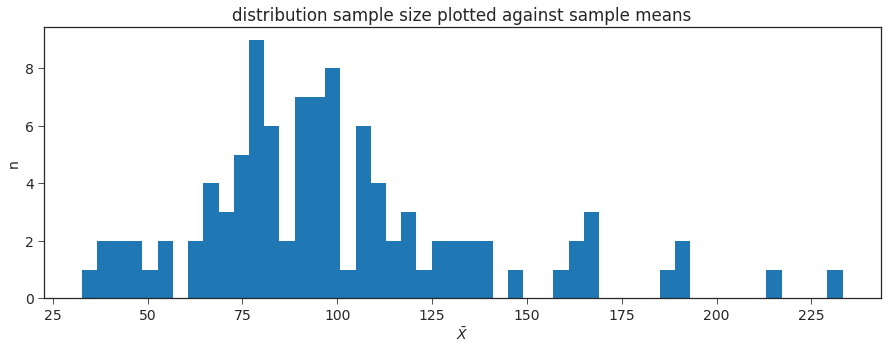

In [13]:
plot_hist('wald', bins = 50)

Fig. 9: histogram of sample means drawn from the Wald distributon ($\lambda$ = 1). According to the law of large numbers, the sample means converge to the population mean as the sample size approaches infinity. In this figure, we see samples with larger sizes plotted closer to the the population mean.

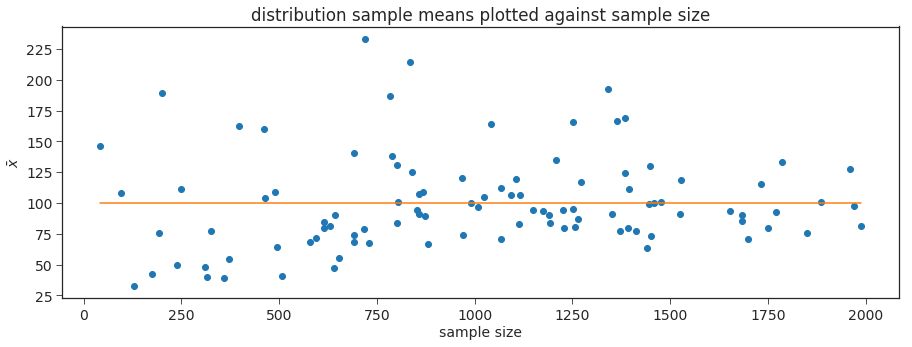

In [14]:
plot_scatter('wald')

Fig. 10: scatterplot of sample means drawn from the Wald distributon ($\lambda$ = 1). According to the law of large numbers, the sample means converge to the population mean as the sample size approaches infinity. In this figure, we see the sample means of the larger-sized samples plotted closer to the population mean asymptote.

## distribution of all sample means

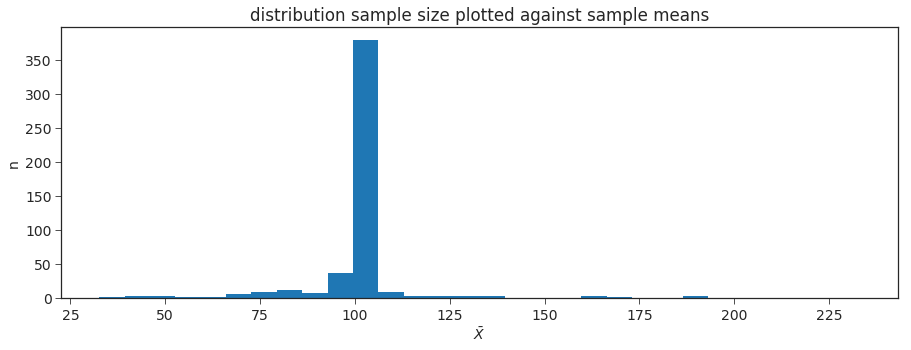

In [15]:
plot_hist('all', bins = 30)

Fig. 11: histogram of all 500 sample means pulled from the five above-specified distributions. According to the law of large numbers, the sample means converge to the population mean as the sample size approaches infinity. In this figure, we see the sample means converging around the population mean of 100.

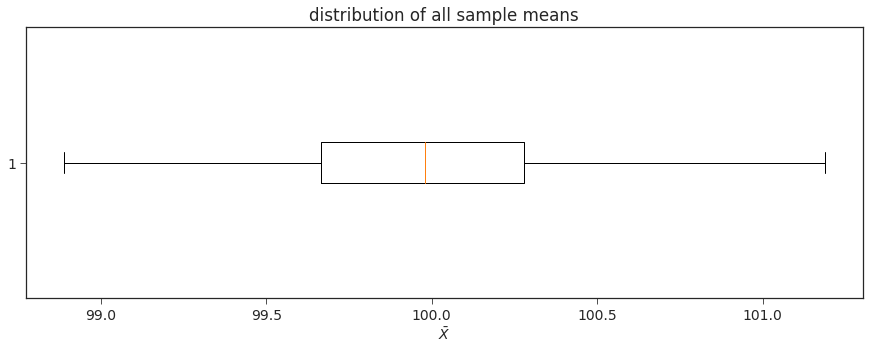

In [16]:
plt.style.use('seaborn-ticks')
fig, ax = plt.subplots(figsize = (15, 5))
ax.set(xlabel = r'$\bar{X}$', title = 'distribution of all sample means')
ax.boxplot(distributions[distribution[5]], vert = False, showfliers = False)
plt.show()

Fig. 12: boxplot of all 500 sample means pulled from the five above-specified distributions. According to the law of large numbers, the sample means converge to the population mean as the sample size approaches infinity. In this figure, we see the sample means converging around the population mean of 100. The interquartile range extends only from 99.75 to 100.25, indicating very tight convergence around the population mean.

## extra credit: fitting a gaussian normal to the distribution of all distribution means

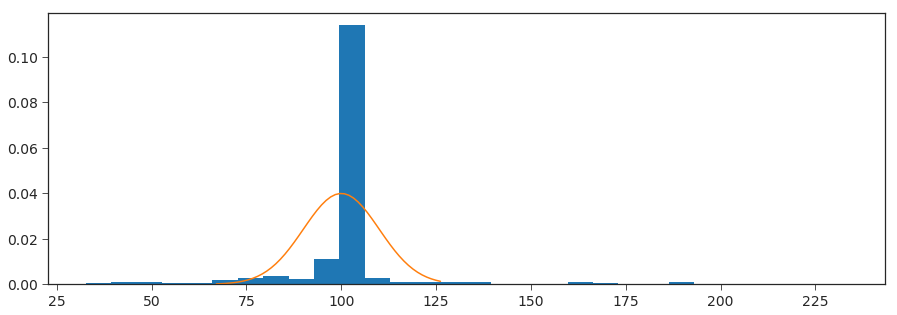

In [17]:
fig, ax = plt.subplots(figsize = (15, 5))
d = np.random.normal(loc = mu, scale = sigma, size = 500)
x = np.linspace(min(d), max(d), 50)
plt.hist(distributions[distribution[5]], bins = 30, normed = True)
plt.plot(x, mlab.normpdf(x, mu, sigma))
# https://stackoverflow.com/questions/46889189/plot-a-density-function-above-a-histogram